In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
dataset= pd.read_csv("C:\\Data\\aapl.csv")

In [3]:
dataset.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
2766,9/27/2019,220.539993,220.960007,217.279999,218.820007,218.820007,25352000
2767,9/30/2019,220.899994,224.580002,220.789993,223.970001,223.970001,25977400


In [4]:
dataset['Mean'] = (dataset['Low'] + dataset['High'])/2
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,10/1/2008,15.988571,16.051428,15.341429,15.588572,13.604352,324121000,15.696429
1,10/2/2008,15.430000,15.541429,14.285714,14.300000,12.479802,402341100,14.913572


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 8 columns):
Date         2768 non-null object
Open         2768 non-null float64
High         2768 non-null float64
Low          2768 non-null float64
Close        2768 non-null float64
Adj Close    2768 non-null float64
Volume       2768 non-null int64
Mean         2768 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 173.1+ KB


In [6]:
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,10/1/2008,15.988571,16.051428,15.341429,15.588572,13.604352,324121000,15.696429
1,10/2/2008,15.430000,15.541429,14.285714,14.300000,12.479802,402341100,14.913572


In [7]:
# preparing the dataset by shoifting open , close, Low, High  by 1
steps=-1
dataset_for_prediction= dataset.copy()
dataset_for_prediction['Actual']=dataset_for_prediction['Mean'].shift(steps)
dataset_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,10/1/2008,15.988571,16.051428,15.341429,15.588572,13.604352,324121000,15.696429,14.913572
1,10/2/2008,15.430000,15.541429,14.285714,14.300000,12.479802,402341100,14.913572,14.367857
2,10/3/2008,14.857142,15.214286,13.521428,13.867143,12.102037,573599600,14.367857,13.308571


In [8]:
dataset_for_prediction=dataset_for_prediction.dropna()

In [9]:
dataset_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,10/1/2008,15.988571,16.051428,15.341429,15.588572,13.604352,324121000,15.696429,14.913572
1,10/2/2008,15.430000,15.541429,14.285714,14.300000,12.479802,402341100,14.913572,14.367857
2,10/3/2008,14.857142,15.214286,13.521428,13.867143,12.102037,573599600,14.367857,13.308571


In [10]:
dataset_for_prediction[2629:2640]

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
2629,3/14/2019,183.899994,184.100006,182.559998,183.729996,182.332397,23579500,183.330002,185.535004
2630,3/15/2019,184.850006,187.330002,183.740005,186.119995,184.704224,39042900,185.535004,187.089996
2631,3/18/2019,185.800003,188.389999,185.789993,188.020004,186.589783,26219800,187.089996,187.455001
2632,3/19/2019,188.350006,188.990005,185.919998,186.529999,185.111115,31646400,187.455001,187.110001
2633,3/20/2019,186.229996,189.490005,184.729996,188.160004,186.728714,31035200,187.110001,193.070000
2634,3/21/2019,190.020004,196.330002,189.809998,195.089996,193.605988,51034200,193.070000,194.235001
2635,3/22/2019,195.339996,197.690002,190.779999,191.050003,189.596725,42407700,194.235001,189.290001
2636,3/25/2019,191.509995,191.979996,186.600006,188.740005,187.304291,43845300,189.290001,188.730004
2637,3/26/2019,191.660004,192.880005,184.580002,186.789993,185.369125,49800500,188.730004,188.154999
2638,3/27/2019,188.750000,189.759995,186.550003,188.470001,187.036346,29848400,188.154999,188.544999


In [11]:
#dataset_for_prediction['Date']=dataset_for_prediction['Date'].asfreq(BDay())

In [12]:
#dataset_for_prediction.to_csv('Check data.csv')

In [13]:
from pandas.tseries.offsets import BDay
dataset_for_prediction['Date'] =pd.to_datetime(dataset_for_prediction['Date'])
dataset_for_prediction.index= dataset_for_prediction['Date']
#dataset_test.index.freq='B'


In [14]:
dataset_for_prediction.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
Date,,,,,,,,,
2008-10-01,2008-10-01,15.988571,16.051428,15.341429,15.588572,13.604352,324121000,15.696429,14.913572
2008-10-02,2008-10-02,15.430000,15.541429,14.285714,14.300000,12.479802,402341100,14.913572,14.367857


In [15]:
dataset_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2767 entries, 2008-10-01 to 2019-09-27
Data columns (total 9 columns):
Date         2767 non-null datetime64[ns]
Open         2767 non-null float64
High         2767 non-null float64
Low          2767 non-null float64
Close        2767 non-null float64
Adj Close    2767 non-null float64
Volume       2767 non-null int64
Mean         2767 non-null float64
Actual       2767 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 216.2 KB


Text(0.5, 1.0, ' Apple Stock Value')

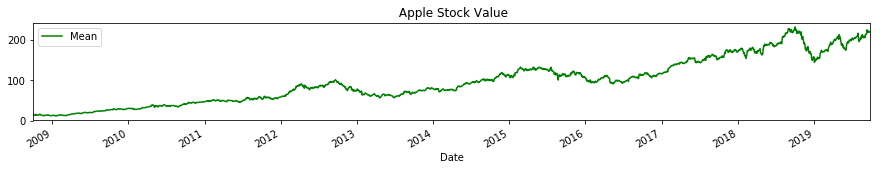

In [16]:

dataset_for_prediction['Mean'].plot(color='green', figsize=(15,2))
plt.legend([  'Mean'])
plt.title(" Apple Stock Value")

Text(0.5, 1.0, ' Apple  Stock Volume')

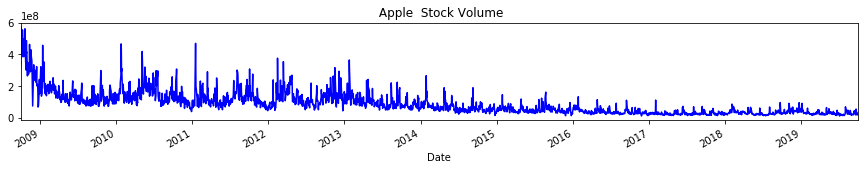

In [17]:
dataset_for_prediction['Volume'].plot(color='blue', figsize=(15,2))
plt.title(" Apple  Stock Volume")

In [18]:
# normalizing input features
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['Low', 'High','Open', 'Close', 'Volume', 'Adj Close', 'Mean']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [20]:
X= scaled_input


In [21]:
X.rename(columns={0:'Low', 1:'High', 2:'Open', 3:'Close', 4:'Volume', 5:'Adj Close', 6:'Mean'}, inplace=True)
X= pd.DataFrame(X)
X.index=dataset_for_prediction.index
X.tail(2)

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2019-09-26,0.94991,0.943496,0.950875,0.944862,0.013289,0.960536,0.946681
2019-09-27,0.94282,0.943587,0.953335,0.940018,0.024883,0.955645,0.943206


In [22]:
y.rename(columns={0:'Stock Price next day'}, inplace= True)
y.index=dataset_for_prediction.index
y.head(2)

,Stock Price next day
Date,
2008-10-01,0.015763
2008-10-02,0.013284


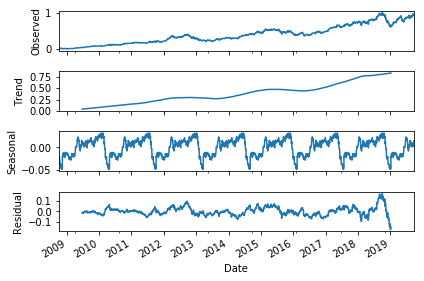

In [23]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['Mean'],model='add',freq=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

In [24]:
train_size=int(len(dataset) *0.80)
test_size = int(len(dataset)) - train_size
print(test_size)

554


In [25]:
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [26]:
test_X.columns

Index(['Low', 'High', 'Open', 'Close', 'Volume', 'Adj Close', 'Mean'], dtype='object')

In [27]:
y_test=y['Stock Price next day'][:train_size].dropna()

In [28]:
type(y_test)

pandas.core.series.Series

In [29]:

from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is  Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [30]:
test_adf(y_test, " Stock Price")

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for  Stock Price


In [31]:
test_adf(y_test.diff(), " Stock Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary  Stock Price


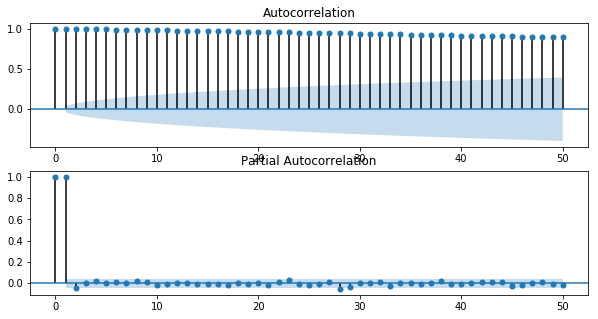

In [32]:
#Correlograms
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()


In [33]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
                     exogenous= train_X,
                     start_p=1,  start_q=1, 
                     max_p=7,  max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-17654.320, BIC=-17591.597, Fit time=4.979 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-17648.029, BIC=-17596.710, Fit time=2.712 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-17695.926, BIC=-17638.905, Fit time=9.711 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-17735.146, BIC=-17678.125, Fit time=9.816 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-17758.577, BIC=-17695.853, Fit time=11.131 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-17762.799, BIC=-17688.672, Fit time=12.446 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-17725.286, BIC=-17656.861, Fit time=9.729 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-17647.935, BIC=-17568.106, Fit time=2.621 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-17658.861, BIC=-17590.436, Fit time=10.068 second

In [ ]:
step_wise.summary()

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
           exog=train_X,
              order=(0,1,1),
              enforce_invertibility=False, enforce_stationarity=False)

C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [35]:
results= model.fit()

C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


In [ ]:
test_X

In [ ]:
test_X.info()

In [ ]:
test_X[['Low', 'High', 'Open', 'Close', 'Volume', 'Adj Close', 'Mean']]

In [ ]:
train_X

In [36]:
step_wise=auto_arima(train_y, 
                     start_p=1,  start_q=1, 
                     max_p=7,  max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-17218.100, BIC=-17195.291, Fit time=2.154 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-17153.382, BIC=-17141.978, Fit time=0.976 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-17213.276, BIC=-17196.170, Fit time=0.798 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-17219.295, BIC=-17202.188, Fit time=0.923 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-17218.621, BIC=-17195.812, Fit time=2.212 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-17217.589, BIC=-17189.078, Fit time=1.722 seconds
Total fit time: 8.790 seconds


In [37]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(0, 1, 1)   Log Likelihood                8612.647
Date:                Sat, 05 Oct 2019   AIC                         -17219.295
Time:                        08:51:37   BIC                         -17202.188
Sample:                             0   HQIC                        -17213.046
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      2.142      0.032    2.33e-05       0.001
ma.L1          0.1761      0.012     14.218      0.000       0.152       0.200
sigma2      2.433e-05   2.94e-07     82.707      0.000    2.38e-05    2.49e-05
===================================================================================
Ljung-Box (Q):                       59.73   Jarque-Bera (JB):             10306.93
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               7.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
model= SARIMAX(train_y,            
              order=(2,1,0),
              enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
forecast = results.forecast(steps=2)

C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [39]:
 a=train_size+test_size-(steps)-train_size
steps

-1

In [40]:
model= SARIMAX(train_y, 
               exog=train_X,            
              order=(0,1,1),
              enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)
print(len(predictions))

C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


553


C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [41]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [42]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])


In [43]:
forecast_apple= pd.DataFrame(forecast_1)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=test_X.index
forecast_apple['Actual'] =scaler_output.iloc[train_size:, 0]
forecast_apple.rename(columns={0:'Forecast'}, inplace=True)

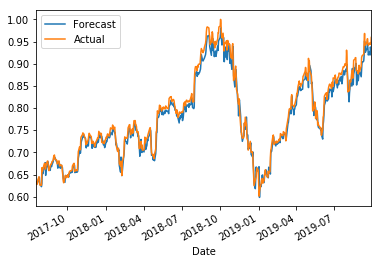

In [44]:
forecast_apple['Forecast'].plot(legend=True)
forecast_apple['Actual'].plot(legend=True)

In [45]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['Stock Price next day']
predictions.rename(columns={0:'Pred'}, inplace=True)



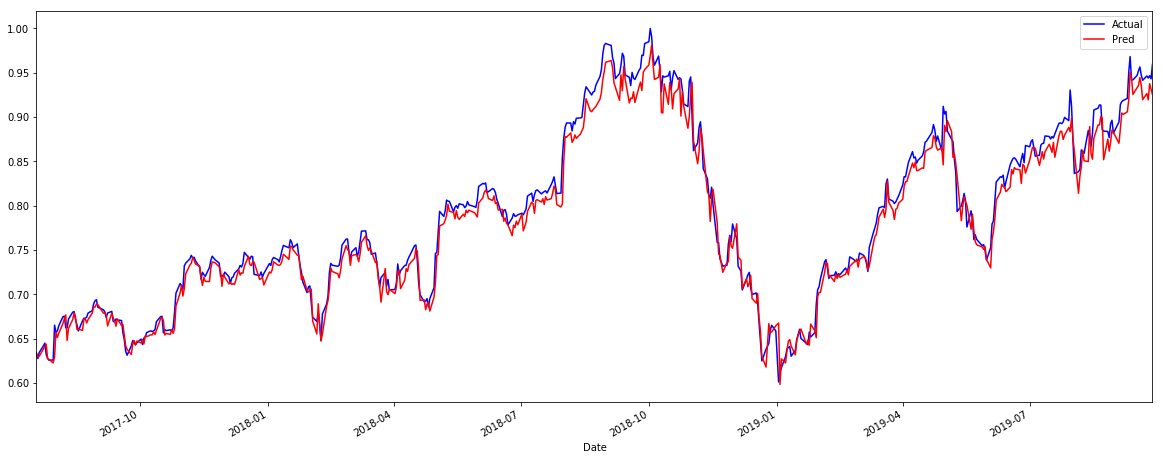

In [46]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))



In [47]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['Pred'], predictions['Actual'])
error

0.014775277947563588

## Inverse Scalar

In [ ]:
X.head(2)


In [53]:
# invert predictions, scale values back to real index/price range.
testPredict = sc_out.inverse_transform(predictions[['Pred']])
testActual = sc_out.inverse_transform(predictions[['Actual']])

In [55]:
act_1=pd.DataFrame(testActual)

In [54]:
#act_pred=pd.DataFrame()
act_pred= pd.DataFrame(testPredict)
act_pred.reset_index(drop=True, inplace=True)
act_pred.index=test_X.index
act_pred['Actual'] = act['Stock Price next day']
predictions.rename(columns={0:'Pred'}, inplace=True)

,0
Date,
2017-07-19,150.991939
2017-07-20,150.098419
2017-07-21,150.226836
2017-07-24,152.075094
2017-07-25,152.666893
2017-07-26,153.226908
2017-07-27,149.636464
2017-07-28,149.459777
2017-07-31,148.562788


In [ ]:
y.head(2)

In [ ]:
train_X, train_y = X.iloc[:train_size,[4,5,6]].dropna(), y[:train_size].dropna()
test_X, test_y = X.iloc[train_size:,[4,5,6]], y[train_size:]

In [ ]:

train_X.shape
train_y.shape

In [ ]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
                     exogenous= train_X,
                     start_p=1,  start_q=1, 
                     max_p=7,  max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

In [ ]:
step_wise.summary()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
           exog=train_X,
              order=(1,1,1),
              enforce_invertibility=False, enforce_stationarity=False)

In [ ]:
results=model.fit()

In [ ]:
predictions= results.predict(start =train_size, end=train_size+829, 
                             exog=test_X)

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
test=pd.DataFrame(dataset.iloc[train_size:, 0])
test.reset_index(drop=True, inplace=True)
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])
predictions['Date'] = test['Date']
predictions.rename(columns={0:'pred', 1:'Date'}, inplace=True)
predictions.index= predictions['Date']
predictions['Actual'] = act['Stock Price next day']


In [ ]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
#y['2008'].plot(figsize=(20,8), legend=True, color='green')
predictions['pred'].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
# invert predictions, scale values back to real index/price range.
#scaler_output
#trainPredict = sc_out.inverse_transform(predictions['pred'])
#testPredict = sc_in.inverse_transform(predictions['Actual'])

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,500, 1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(train_X,
         train_y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
reg_1 = xgb.XGBRegressor(n_estimators=1500, learning_rate=0.05, max_depth=5,subsample=0.7)
reg_1.fit(train_X, train_y)
_ = plot_importance(reg_1, height=0.9)

In [ ]:
pred=reg_1.predict(test_X)

In [ ]:
type(pred)

In [ ]:
predictions=pd.DataFrame(pred)
predictions.reset_index(drop=True, inplace=True)
test=pd.DataFrame(dataset.iloc[train_size:, 0])
test.reset_index(drop=True, inplace=True)
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])
predictions['Date'] = test['Date']
predictions.rename(columns={0:'pred', 1:'Date'}, inplace=True)
predictions.index= predictions['Date']
predictions['Actual'] = act['Stock Price next day']


In [ ]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
#y['2008'].plot(figsize=(20,8), legend=True, color='green')
predictions['pred'].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras import Sequential
from keras.layers import Dense, LSTM, BatchNormalization, Dropout,Activation
n_input=3
n_features =3
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_tinput=StandardScaler()
sc_toutput=StandardScaler()

In [ ]:
sc_X = sc_tinput.fit_transform(dataset_for_prediction[[ 'Volume', 'Adj Close', 'Mean']])
sc_Y = sc_toutput.fit_transform(dataset_for_prediction[['Actual']])

In [ ]:
sc_train_X=sc_X[:train_size]
sc_test_X=sc_X[train_size:]
sc_train_y=sc_Y[:train_size]
sc_test_y=sc_Y[train_size:]

In [ ]:
sc_test_y

In [ ]:
generator_train= TimeseriesGenerator(sc_train_X, sc_train_y, length=n_input, batch_size=32)
generator_test= TimeseriesGenerator(sc_test_X, sc_test_y, length=n_input, batch_size=32)


In [ ]:
model = Sequential()
model.add(LSTM(units=150, return_sequences= True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(BatchNormalization())    
model.add(Activation('relu'))
model.add(LSTM(units=150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(1))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit_generator(generator_train, epochs=200)

In [ ]:
myloss=model.history.history['loss']

In [ ]:
plt.plot(range(len(myloss)), myloss)

In [ ]:
predict_train= model.predict_generator(generator_train)
predict_test= model.predict_generator(generator_test)

In [ ]:
sc_test_y

In [ ]:
predictions=pd.DataFrame(predict_test)
predictions.reset_index(drop=True, inplace=True)
test=pd.DataFrame(dataset.iloc[train_size:, 0])
test.reset_index(drop=True, inplace=True)
act= pd.DataFrame(sc_test_y)
act.rename(columns={0:'Stock Price next day'}, inplace=True)
predictions['Actual'] = act['Stock Price next day']
predictions['Date'] = test['Date']
predictions.rename(columns={0:'pred', 1:'Date'}, inplace=True)
predictions.index= predictions['Date']



In [ ]:
predictions

In [ ]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
#y['2008'].plot(figsize=(20,8), legend=True, color='green')
predictions['pred'].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
train_X

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
model= ARIMA(train_y, 
           exog=train_X,
              order=(0,1,1))

In [ ]:
results= model.fit()

In [ ]:
predictions= results.predict(start =train_size, end=train_size+829, 
                             exog=test_X)

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
test=pd.DataFrame(dataset.iloc[train_size:, 0])
test.reset_index(drop=True, inplace=True)
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])
predictions['Date'] = test['Date']
predictions.rename(columns={0:'pred', 1:'Date'}, inplace=True)
predictions.index= predictions['Date']
predictions['Actual'] = act['Stock Price next day']


In [ ]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
#y['2008'].plot(figsize=(20,8), legend=True, color='green')
predictions['pred'].plot(legend=True, color='red', figsize=(20,8))